### Import Libraries

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Additional libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

### Load the Dataset

In [30]:
data = pd.read_csv('E:\Oasis_InfoByte\CSV_FILES\WineQT.csv')

### Explore the Data

In [31]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [33]:
# Check for missing values
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [34]:
# Exploring data with descriptive statistics
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


### Feature Selection

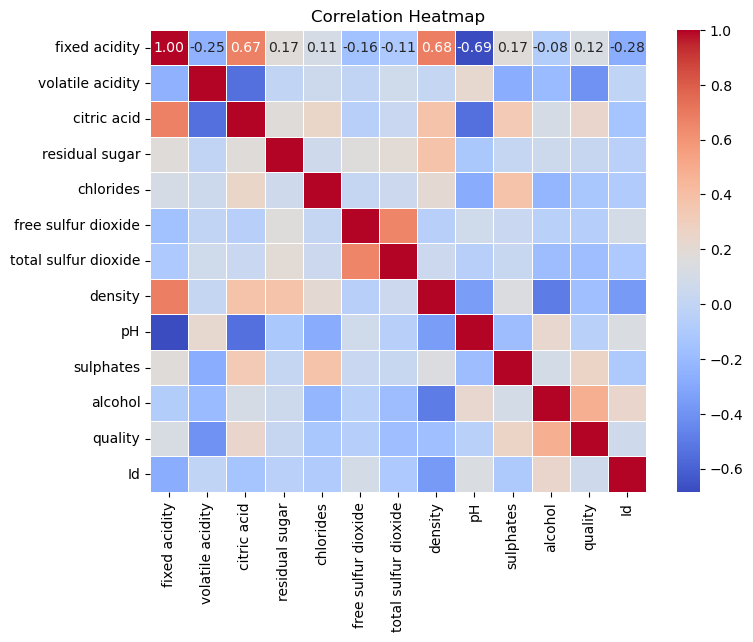

Correlation with Target Variable:
residual sugar          0.022002
pH                      0.052453
free sulfur dioxide     0.063260
Id                      0.069708
fixed acidity           0.121970
chlorides               0.124085
density                 0.175208
total sulfur dioxide    0.183339
citric acid             0.240821
sulphates               0.257710
volatile acidity        0.407394
alcohol                 0.484866
quality                 1.000000
Name: quality, dtype: float64

Irrelevant Features:
- residual sugar
- pH
- free sulfur dioxide
- Id

Dataset after removing irrelevant features:
      fixed acidity  volatile acidity  citric acid  chlorides  \
0               7.4             0.700         0.00      0.076   
1               7.8             0.880         0.00      0.098   
2               7.8             0.760         0.04      0.092   
3              11.2             0.280         0.56      0.075   
4               7.4             0.700         0.00      0.076   
.

In [35]:
# Calculate correlation matrix
correlation_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Identify features with low correlation to the target variable
target_correlation = correlation_matrix['quality'].abs().sort_values(ascending=True)
print("Correlation with Target Variable:")
print(target_correlation)

irrelevant_features = target_correlation[target_correlation < 0.1].index.tolist()

# Display irrelevant features
print("\nIrrelevant Features:")
for feature in irrelevant_features:
    print("-", feature)

# Optionally, remove irrelevant features from the dataset
if irrelevant_features:
    data.drop(columns=irrelevant_features, inplace=True)
    print("\nDataset after removing irrelevant features:")
    print(data)
else:
    print("\nNo irrelevant features found.")

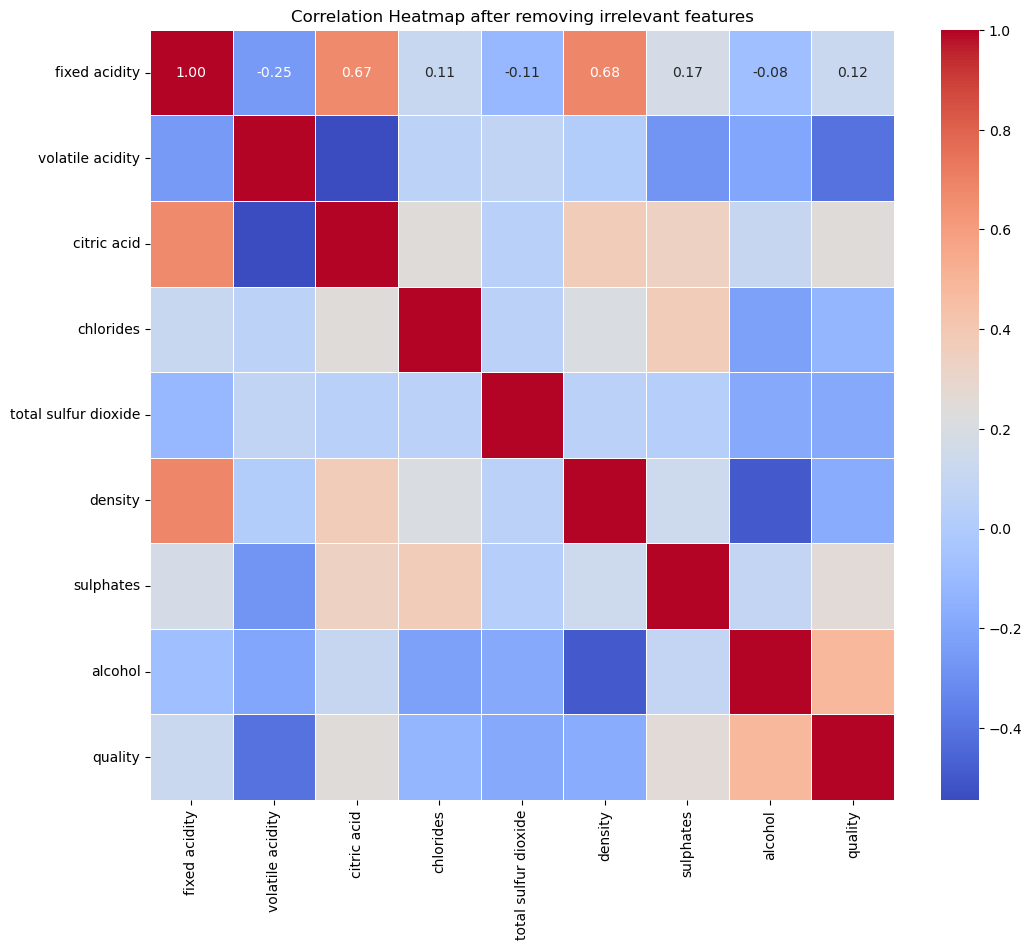

In [36]:
# Optionally, re-calculate the correlation matrix and plot the heatmap again
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap after removing irrelevant features')
plt.show()

### Data Pre-processing

In [37]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = data.drop(columns=['quality'])
y = data['quality']
# Define numerical and categorical features
numerical_features = data.drop(columns=['quality']).columns
categorical_features = []

# Define preprocessing steps for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps for numerical and categorical features
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

# Define the full pipeline
full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Apply preprocessing steps
X_transformed = full_pipeline.fit_transform(X)
X_transformed

array([[-0.52157961,  0.93933222, -1.36502663, ...,  0.55585438,
        -0.57365783, -0.96338181],
       [-0.29259344,  1.94181282, -1.36502663, ...,  0.03616459,
         0.1308811 , -0.59360107],
       [-0.29259344,  1.27349242, -1.16156762, ...,  0.14010255,
        -0.04525363, -0.59360107],
       ...,
       [-1.20853813,  0.38239855, -0.9581086 , ..., -0.95124601,
        -0.45623467,  0.05351522],
       [-1.38027776,  0.10393172, -0.8563791 , ..., -0.83691426,
         0.60057372,  0.70063152],
       [-1.38027776,  0.6330187 , -0.75464959, ..., -0.65502283,
         0.30701583, -0.22382033]])

### Split Data into Training and Testing Sets

In [38]:
# Assuming X_transformed is your preprocessed feature matrix and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# X_train: Training features
# X_test: Testing features
# y_train: Training target variable
# y_test: Testing target variable

# The test_size parameter specifies the proportion of the dataset to include in the test split.
# Here, 0.2 indicates that 20% of the data will be used for testing.
# The random_state parameter sets the seed for random number generation, ensuring reproducibility.

print("Training set features (X_train):")
print(X_train)

print("\nTraining set target variable (y_train):")
print(y_train)

print("\nTesting set features (X_test):")
print(X_test)

print("\nTesting set target variable (y_test):")
print(y_test)

Training set features (X_train):
[[ 0.10813236 -1.39978919  1.48339955 ...  0.08813357  0.54186214
   0.05351522]
 [ 0.90958396 -1.17701572  1.48339955 ... -0.7225825   0.42443899
   0.88552188]
 [ 0.33711853 -1.23270909  0.46610448 ... -0.57706936  0.18959268
   1.25530262]
 ...
 [-0.52157961 -1.00993562  0.31351022 ... -1.05518397 -0.33881152
   1.34774781]
 [-0.2353469   0.21531845  0.21178072 ...  0.0205739   0.18959268
  -0.87093663]
 [-0.46433307 -0.06314838  0.6695635  ... -1.03439638 -0.10396521
   1.25530262]]

Training set target variable (y_train):
12      7
758     6
636     5
1109    5
743     5
       ..
1044    4
1095    5
1130    6
860     6
1126    6
Name: quality, Length: 914, dtype: int64

Testing set features (X_test):
[[-0.86505887  0.43809192 -1.16156762 ... -0.76935458 -0.33881152
  -0.87093663]
 [-0.80781233  1.71903936 -0.29686681 ...  0.87806205  0.36572741
  -1.11745712]
 [-0.75056579  0.27101182 -0.75464959 ... -0.58746316 -1.04335045
   0.05351522]
 ...
 [-

### Train Models

In [39]:
# Create instances of Classifiers
random_forest_clf = RandomForestClassifier()
sgd_clf = SGDClassifier()
svc_clf = SVC()

# Fit the models to the training data using the fit method
random_forest_clf.fit(X_train, y_train)
sgd_clf.fit(X_train, y_train)
svc_clf.fit(X_train, y_train)

SVC()

### Evaluate Models

In [40]:
# Example: Make predictions using the trained models
y_pred_rf = random_forest_clf.predict(X_test)
y_pred_sgd = sgd_clf.predict(X_test)
y_pred_svc = svc_clf.predict(X_test)

# Print predicted labels for each classifier
print("Random Forest Classifier predictions:", y_pred_rf)
print("SGD Classifier predictions:", y_pred_sgd)
print("Support Vector Classifier predictions:", y_pred_svc)

Random Forest Classifier predictions: [5 6 5 5 7 6 5 5 6 5 7 7 6 6 5 5 6 5 5 7 6 6 5 7 5 5 7 6 5 6 6 5 7 6 5 5 6
 6 7 6 7 6 6 5 5 5 5 6 5 6 7 5 5 7 6 6 5 6 6 5 5 6 6 7 6 6 6 5 5 5 7 5 5 6
 5 5 5 6 5 6 5 6 6 5 5 6 5 6 6 6 5 6 5 5 5 5 5 6 6 5 6 6 5 6 5 5 6 6 6 7 7
 5 5 6 5 6 6 6 5 5 5 5 5 6 5 6 6 6 5 6 5 5 7 6 7 5 5 5 5 6 7 5 5 5 6 5 5 5
 5 5 7 5 6 5 6 5 5 5 7 6 5 5 6 6 7 5 6 6 6 5 6 6 6 5 5 5 7 6 6 5 6 5 6 5 5
 5 7 5 6 6 6 6 7 5 6 6 5 6 7 6 6 6 5 5 7 7 5 6 6 6 5 6 6 6 5 6 6 5 7 6 5 6
 5 6 5 6 6 6 6]
SGD Classifier predictions: [6 5 6 5 7 6 6 5 6 5 7 7 6 6 6 5 5 6 6 6 6 7 5 6 6 6 6 7 6 6 6 6 7 6 5 6 5
 6 6 7 7 6 6 6 6 6 6 7 5 6 6 6 6 7 6 7 6 6 7 6 5 6 7 6 6 6 6 6 5 6 7 6 7 6
 6 6 7 5 6 5 6 6 7 6 6 7 6 6 6 6 3 6 5 5 5 5 5 7 7 6 6 6 5 6 6 5 7 7 6 7 6
 5 5 7 5 5 6 7 6 5 6 5 5 7 6 6 6 6 5 7 5 5 5 6 7 6 5 5 6 6 7 6 5 5 7 5 5 6
 5 5 7 5 7 5 7 6 6 7 7 6 7 5 6 6 6 6 7 6 6 5 6 6 5 6 6 5 7 6 6 6 7 5 5 6 5
 5 6 5 7 5 6 6 6 5 6 6 6 6 7 6 6 6 5 6 7 7 5 5 6 7 6 7 5 6 5 6 7 5 7 5 6 6
 6 6 6 7 6 5 6]
Su

In [41]:
from sklearn.metrics import accuracy_score

# Calculate accuracy score for each classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

# Print accuracy score for each classifier
print("Random Forest Classifier accuracy:", accuracy_rf)
print("SGD Classifier accuracy:", accuracy_sgd)
print("Support Vector Classifier accuracy:", accuracy_svc)

Random Forest Classifier accuracy: 0.6637554585152838
SGD Classifier accuracy: 0.4978165938864629
Support Vector Classifier accuracy: 0.6331877729257642


### Visualization

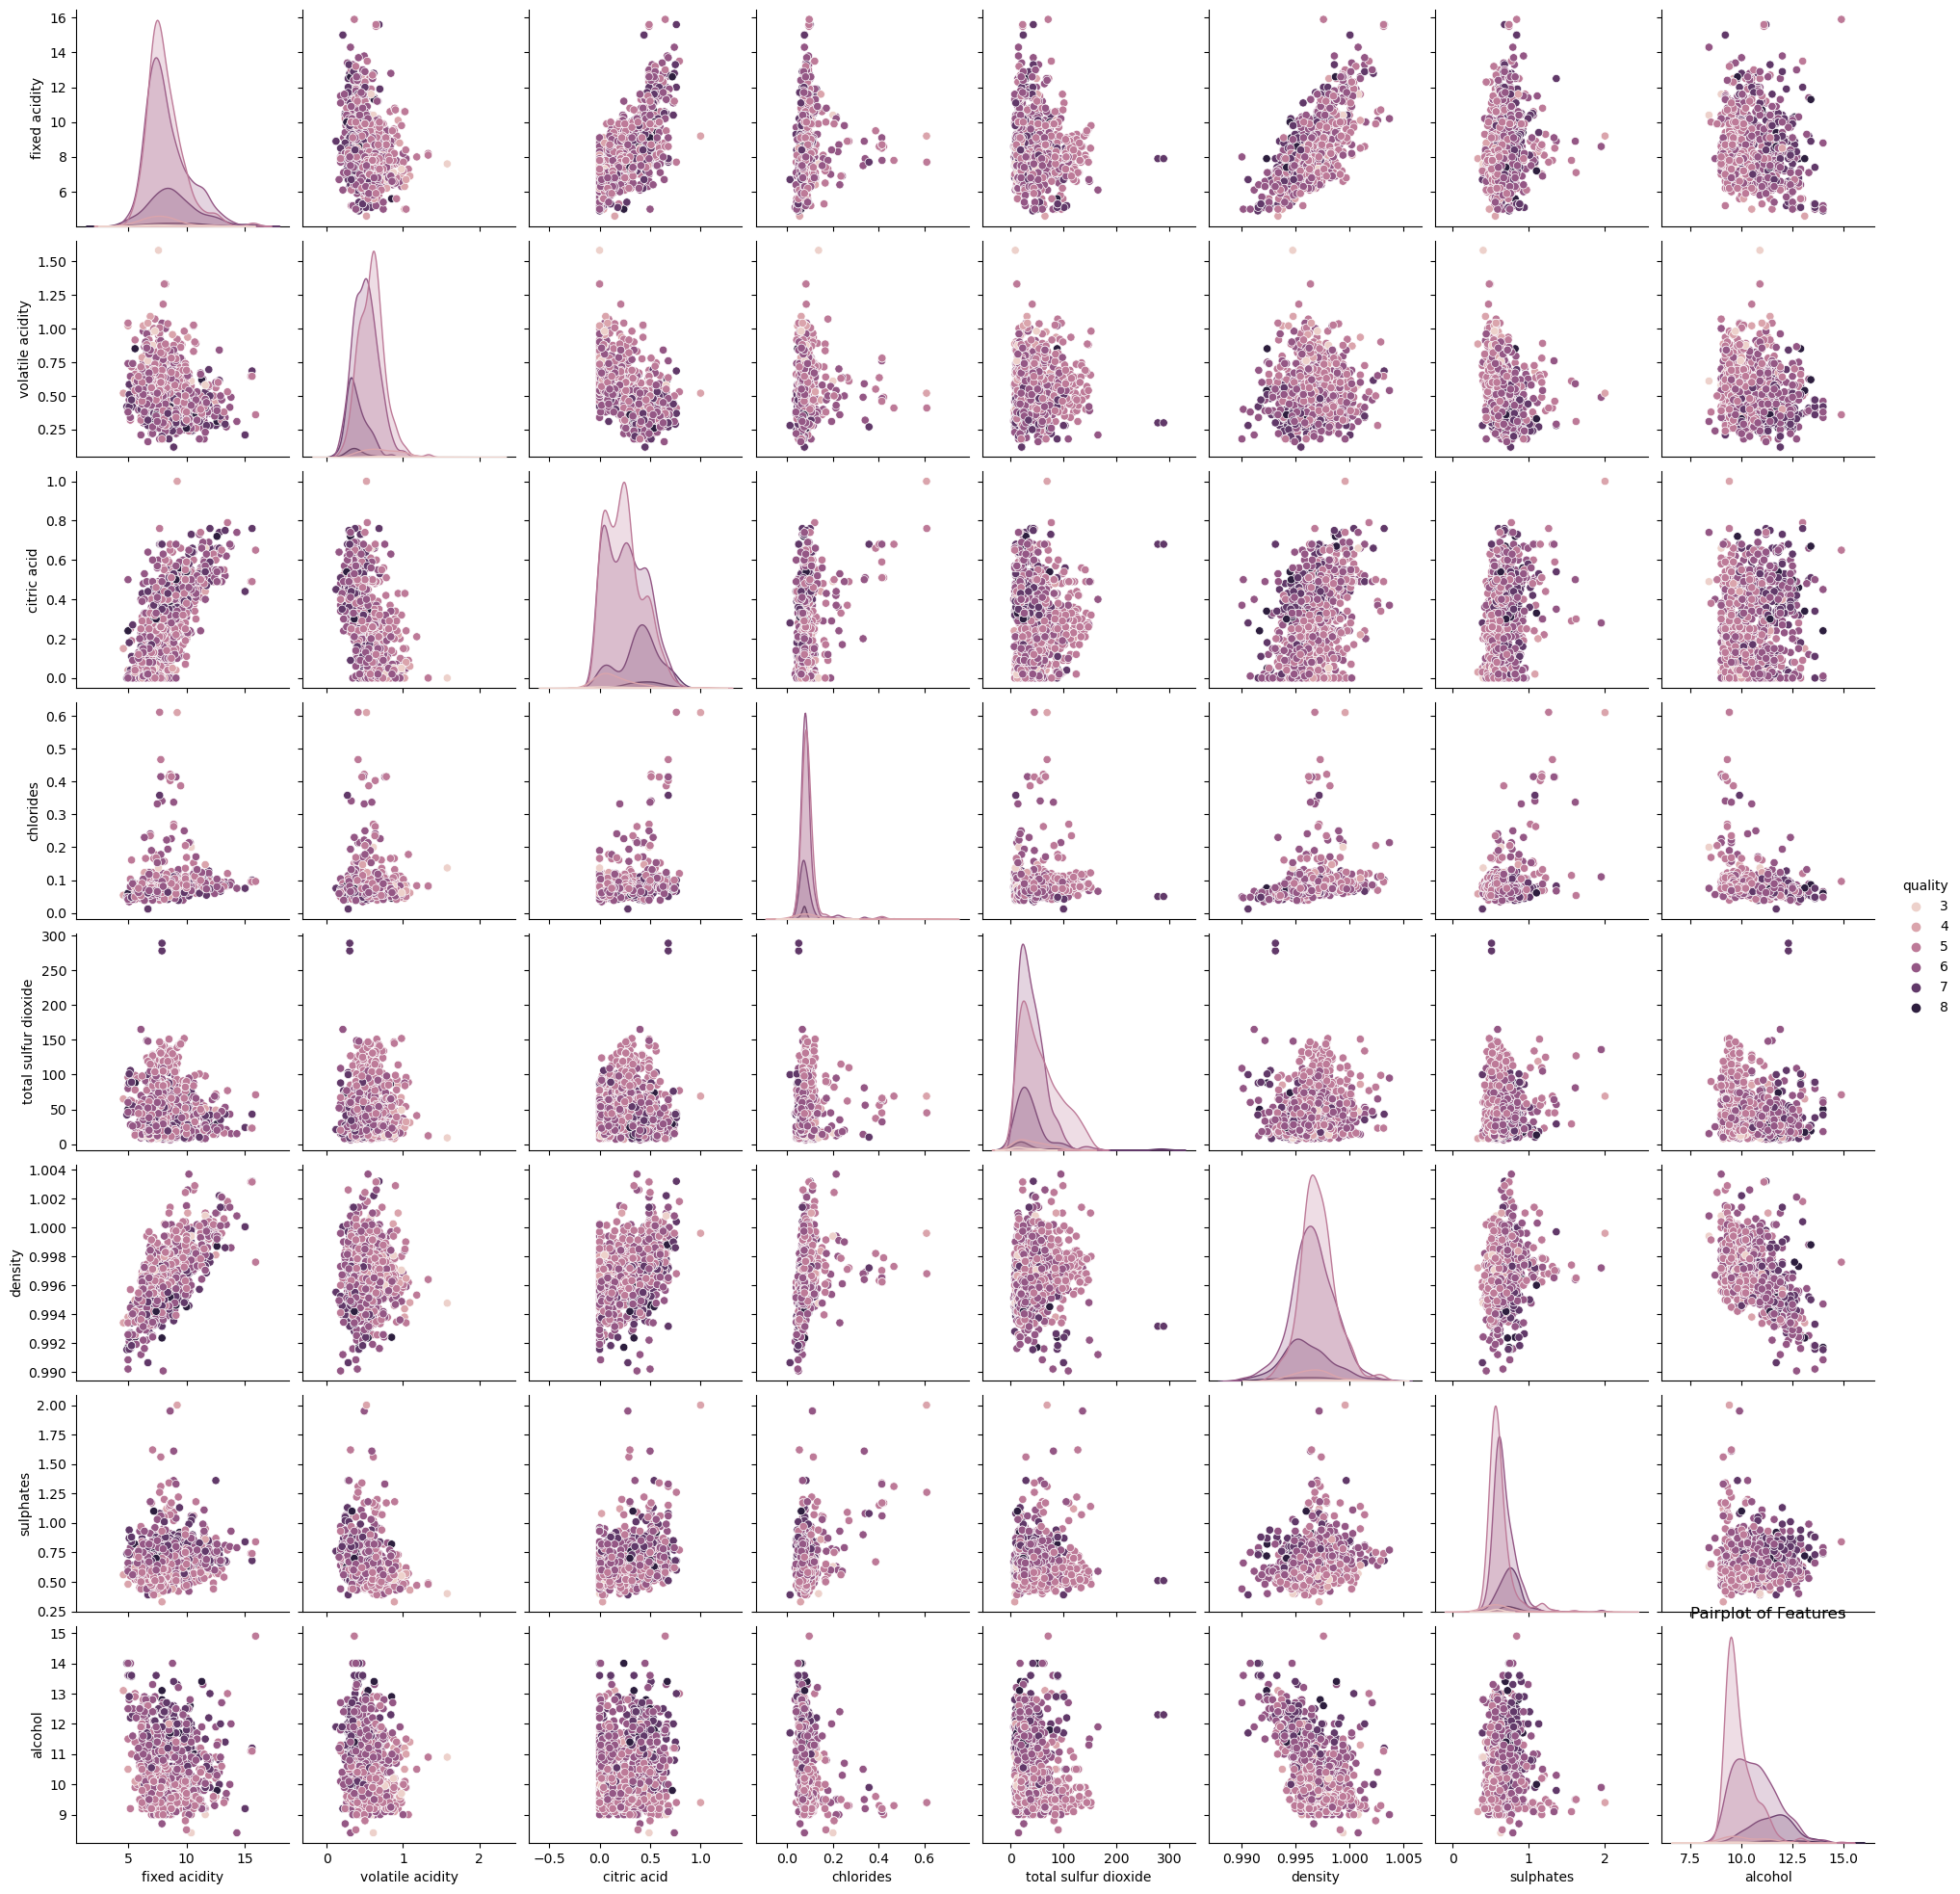

In [42]:
# Visualize feature relationships
sns.pairplot(data, hue = 'quality')
plt.title('Pairplot of Features')
plt.show()

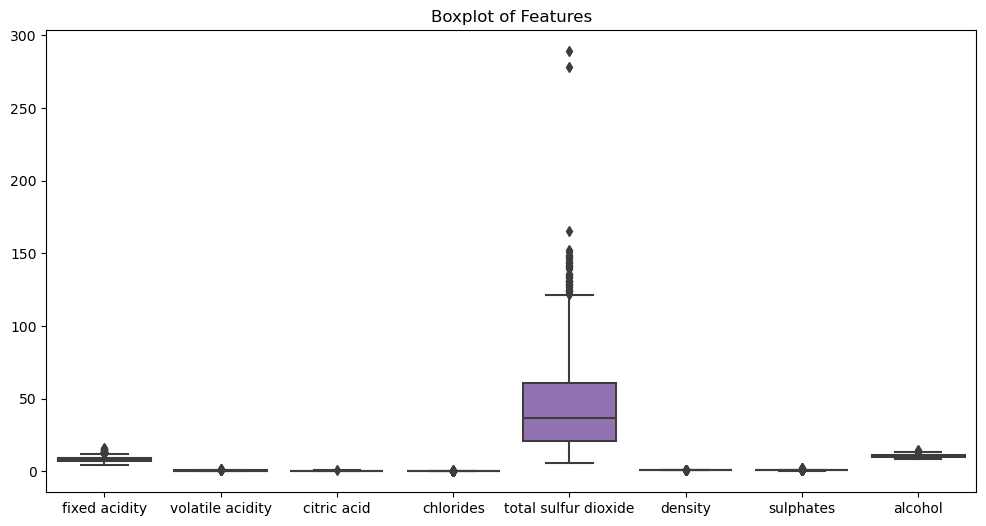

In [43]:
# Explore data distributions
plt.figure(figsize = (12, 6))
sns.boxplot(data = data.drop(columns = 'quality'))
plt.title('Boxplot of Features')
plt.show()

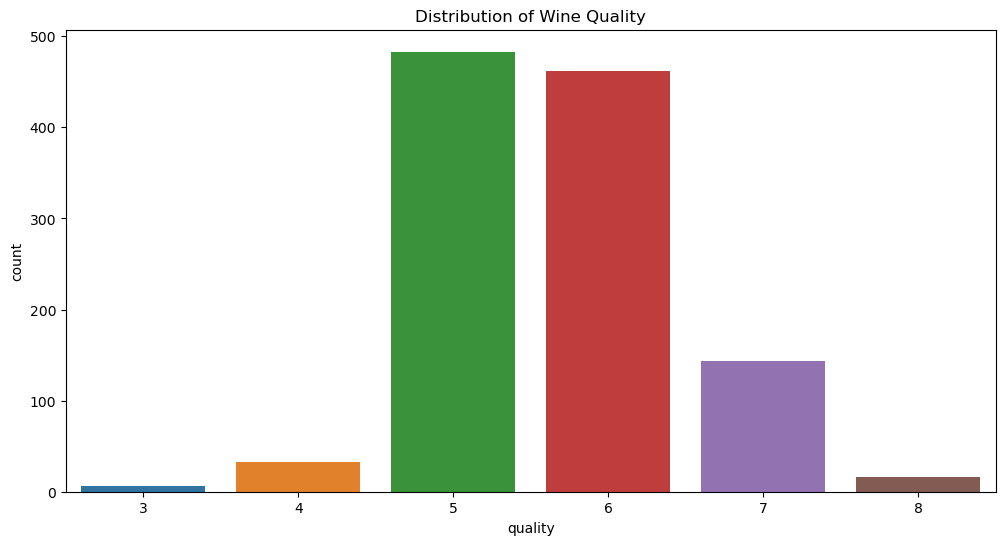

In [44]:
# Identify patterns related to wine quality
plt.figure(figsize = (12, 6))
sns.countplot(x = 'quality', data = data)
plt.title('Distribution of Wine Quality')
plt.show()

## Conclusion

Wine Quality Prediction: Machine Learning Meets the Vineyard

Explored how machine learning can predict wine quality. Here's the gist:

Data is Key: We use data on wine characteristics (acidity, alcohol, etc.) from public sources.

Feature Engineering: We might create new features to help the model learn better (e.g., categorizing acidity).

Model Selection: We choose a machine learning model (e.g., Decision Tree) to analyze the data and predict quality.

Evaluation and Refinement: We test the model's accuracy and improve it with adjustments and new data.

Overall, machine learning provides a powerful tool for winemakers and consumers to understand and predict wine quality.